In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/auto-mpg.data"
column_names_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names"

In [3]:
# Fetch column names from the .names file
columns = [
    "mpg", "cylinders", "displacement", "horsepower", "weight",
    "acceleration", "model year", "origin", "car name"
]


In [4]:
# Load the data using the specified column names
df = pd.read_csv(url, sep='\s+', names=columns, na_values='?')


In [5]:
# Display the first few rows of the dataset
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


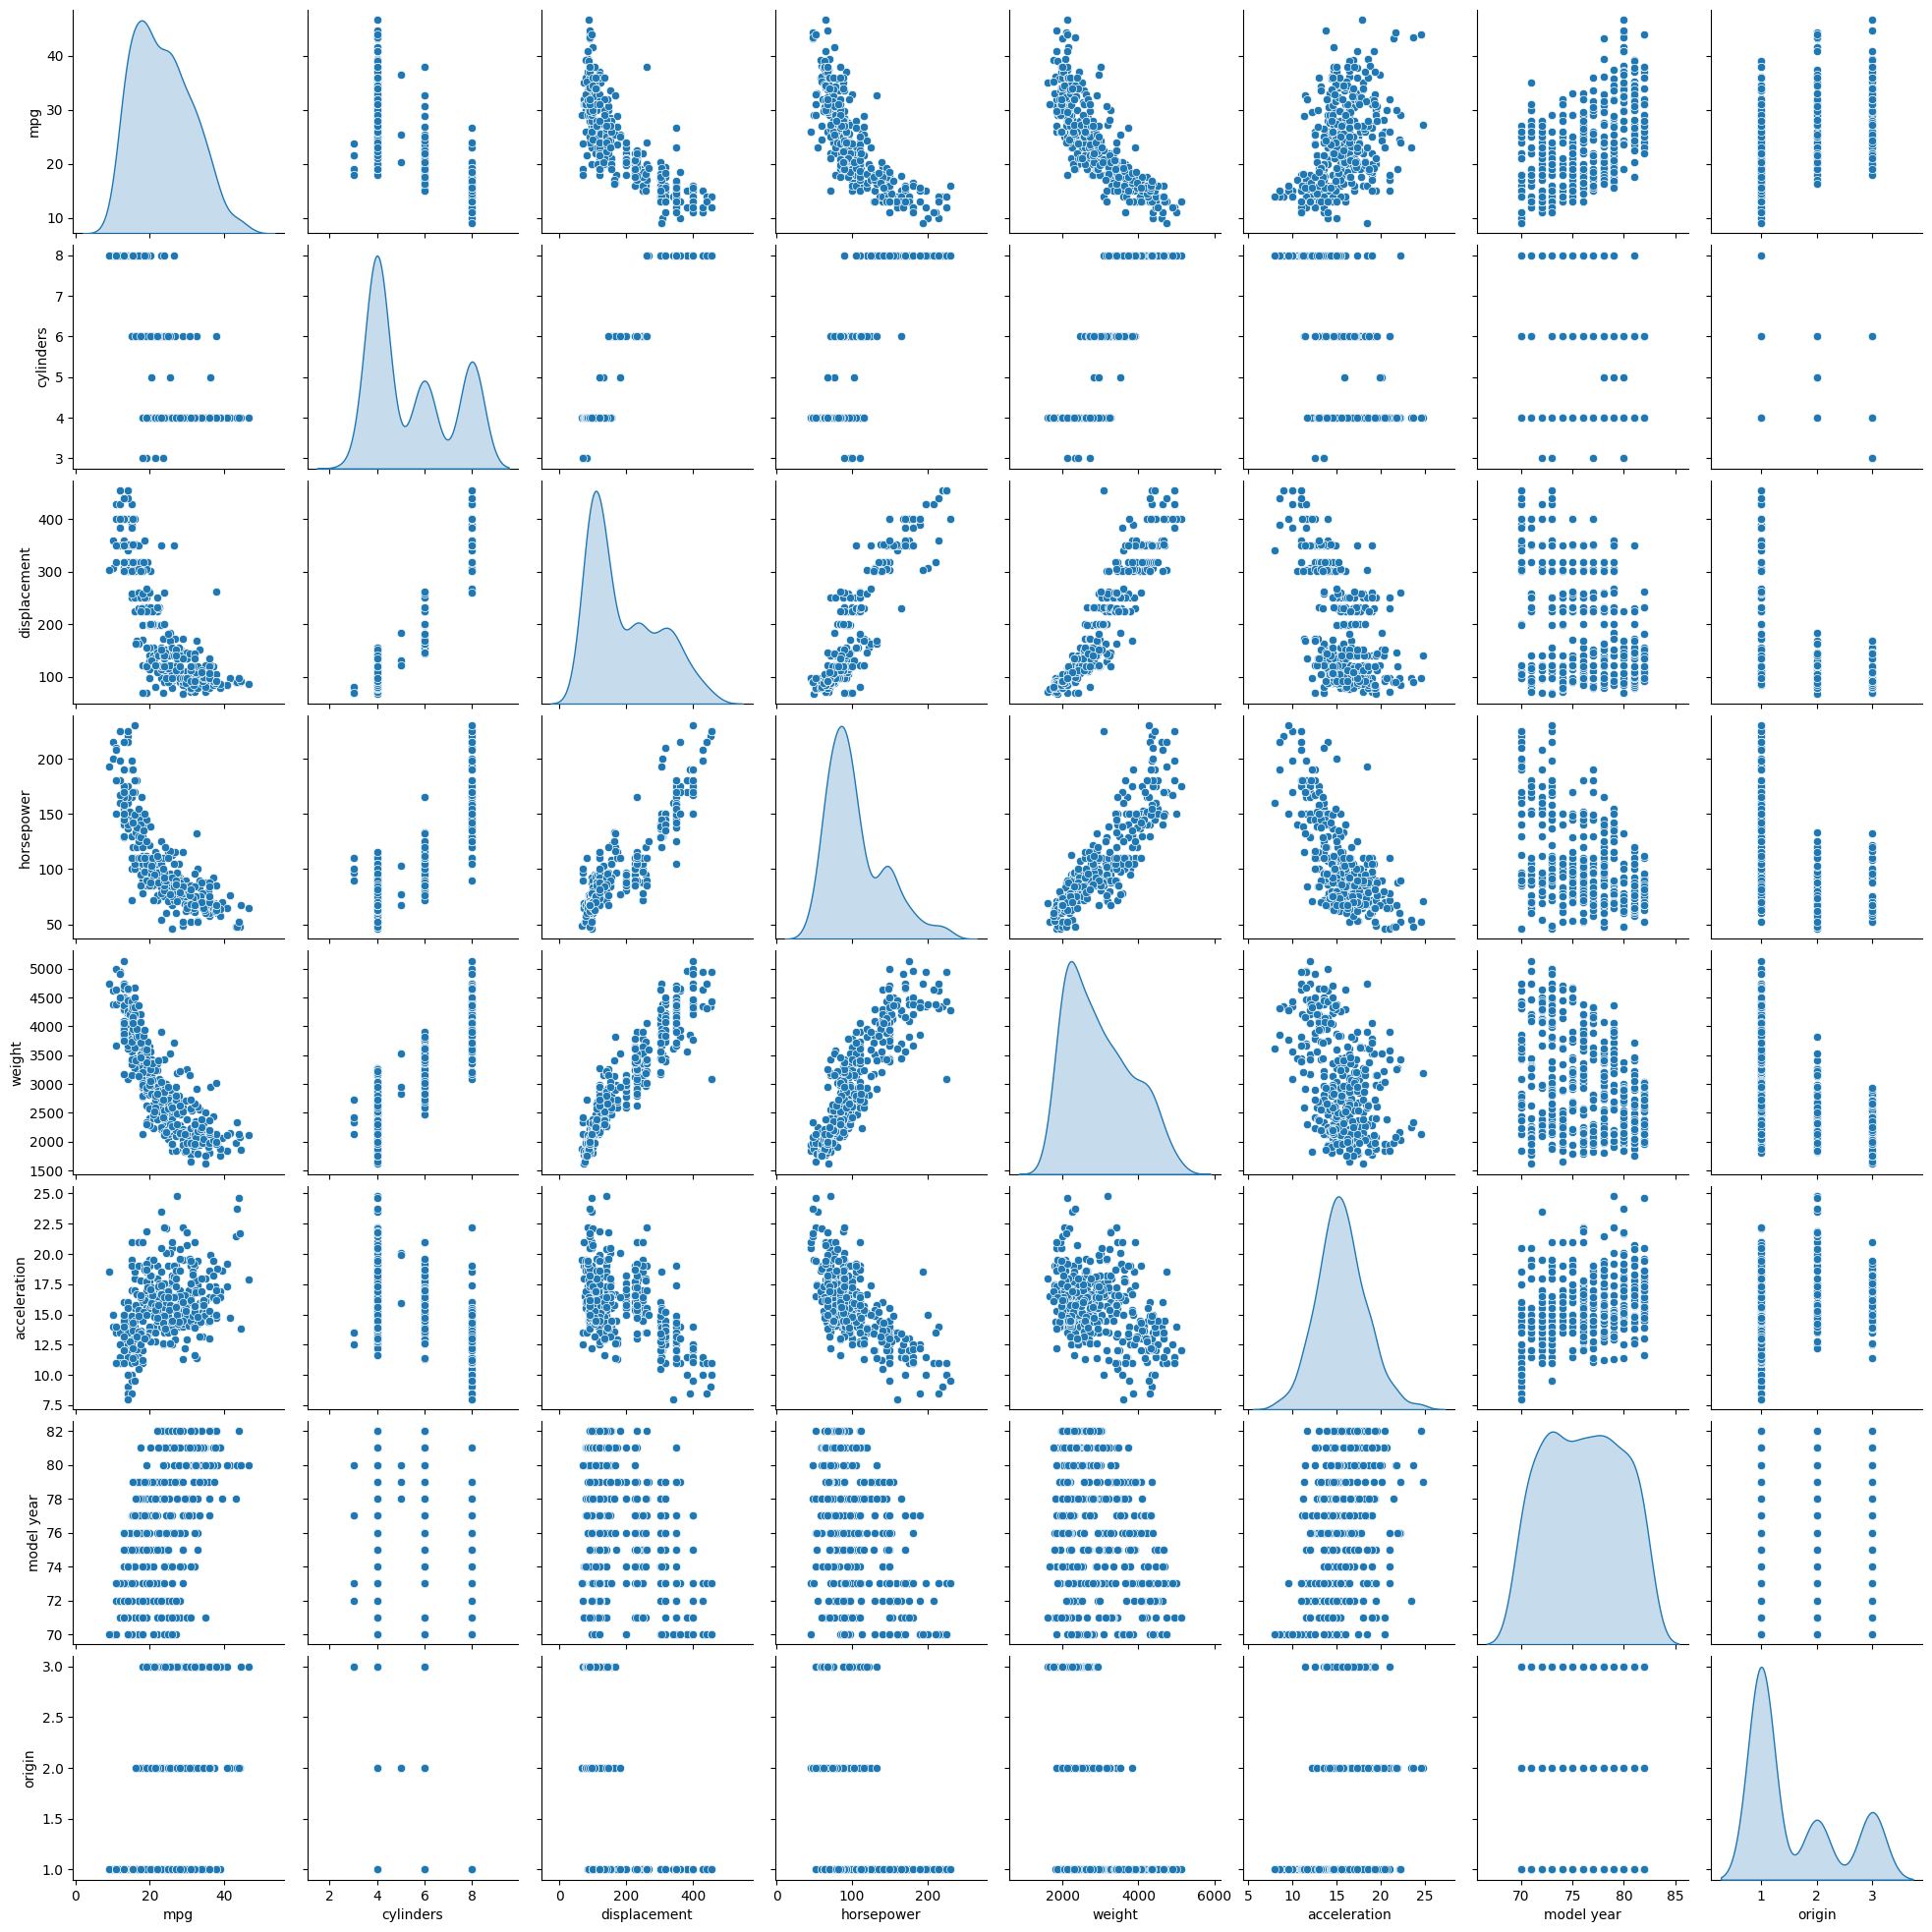

In [6]:
# Exploratory Data Analysis (EDA)
# Visualize relationships between variables using pair plots and correlation heatmap
sns.pairplot(df, diag_kind='kde')
plt.show()

<ipython-input-7-c23c11be3352>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


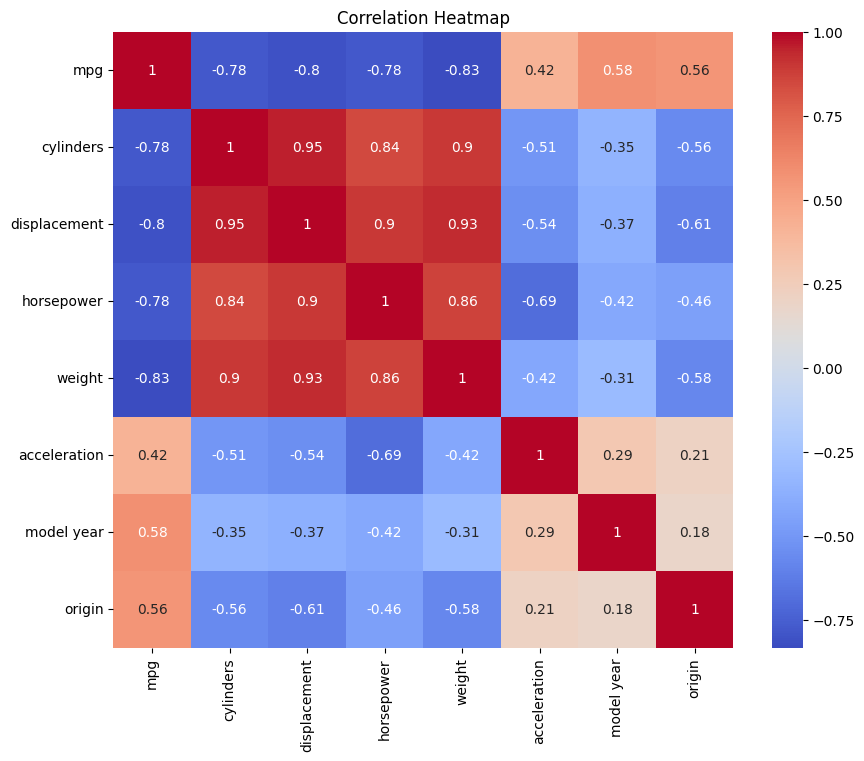

In [7]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# Handle missing values
df.dropna(inplace=True)

In [9]:
# Prepare features (X) and target variable (y)
X = df.drop(['mpg', 'car name'], axis=1)
y = df['mpg']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_preds = linear_model.predict(X_test)

In [12]:
# Ridge Regression
ridge_model = make_pipeline(StandardScaler(), Ridge())
ridge_model.fit(X_train, y_train)
ridge_preds = ridge_model.predict(X_test)

In [13]:
# Lasso Regression
lasso_model = make_pipeline(StandardScaler(), Lasso())
lasso_model.fit(X_train, y_train)
lasso_preds = lasso_model.predict(X_test)

In [14]:
# Evaluate models
def evaluate_model(model_name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    print(f"{model_name} Metrics:")
    print(f"R2 Score: {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print("\n")

evaluate_model("Linear Regression", y_test, linear_preds)
evaluate_model("Ridge Regression", y_test, ridge_preds)
evaluate_model("Lasso Regression", y_test, lasso_preds)

Linear Regression Metrics:
R2 Score: 0.7902
Mean Squared Error (MSE): 10.7109
Root Mean Squared Error (RMSE): 3.2727
Mean Absolute Error (MAE): 2.4198


Ridge Regression Metrics:
R2 Score: 0.7890
Mean Squared Error (MSE): 10.7674
Root Mean Squared Error (RMSE): 3.2814
Mean Absolute Error (MAE): 2.4243


Lasso Regression Metrics:
R2 Score: 0.8030
Mean Squared Error (MSE): 10.0529
Root Mean Squared Error (RMSE): 3.1706
Mean Absolute Error (MAE): 2.2550




In [15]:
# Identify the best model based on R2 Score
models = ["Linear Regression", "Ridge Regression", "Lasso Regression"]
r2_scores = [r2_score(y_test, linear_preds), r2_score(y_test, ridge_preds), r2_score(y_test, lasso_preds)]

best_model_index = np.argmax(r2_scores)
best_model = models[best_model_index]

In [16]:
# Make new predictions using the best model
if best_model == "Linear Regression":
    best_model_preds = linear_model.predict(X_test)
elif best_model == "Ridge Regression":
    best_model_preds = ridge_model.predict(X_test)
else:
    best_model_preds = lasso_model.predict(X_test)

In [17]:
# Display predictions and evaluate the best model
print(f"Predictions using the Best Model ({best_model}):")
print(best_model_preds)

evaluate_model(f"Best Model ({best_model})", y_test, best_model_preds)

Predictions using the Best Model (Lasso Regression):
[26.02482031 25.77253788 32.06904051 26.10644585 27.68226643 28.9605887
 10.55450921 28.9367974  21.22159824 28.44692397 14.545652   24.59735469
 17.1585985  28.32094072 22.38020093 28.6392392  21.51918988 30.71084606
 26.69928199 28.6678138  20.7139732  32.03505474 32.69264993 16.88121527
 28.34272677 26.00024404 21.71103991 17.99292489 28.0355834  24.26942826
 14.60138328 23.21494604 21.3908378  29.21877187 13.32139895 33.20396004
 13.04624559 25.6758427  13.74673671 10.30357028 14.86437636 27.51074666
 32.63649285 26.47410466 13.4331065  11.33792852 18.8624028  30.22329048
 24.85176024 29.5647435  13.81717986 25.92009271 24.308194   32.15536223
 27.22270407 18.60009808 21.31957558 23.02167366 23.71203433 25.62796054
 10.11498104 22.76231648 26.2416398  23.4845214  28.00460536 27.98045251
 25.81211231 29.00934177 22.22756443 11.89184654 23.70409905 15.02394387
 25.85246168 27.32917617 23.58128796 25.47575783 15.37558987 17.08381207